In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [48]:
df = pd.read_csv("data/Summary of Weather.csv")

/var/folders/0h/_3vs5ymj39b11nq0qq82kq2m0000gn/T/ipykernel_35603/1125995882.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Summary of Weather.csv")


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [50]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [52]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [53]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

(array([3.6000e+01, 6.2300e+02, 4.1800e+02, 1.2300e+03, 3.4390e+03,
        6.5750e+03, 1.6862e+04, 7.7263e+04, 1.1090e+04, 1.5040e+03]),
 array([-3.33333333e+01, -2.50000000e+01, -1.66666667e+01, -8.33333333e+00,
         2.00000017e-09,  8.33333333e+00,  1.66666667e+01,  2.50000000e+01,
         3.33333333e+01,  4.16666667e+01,  5.00000000e+01]),
 <BarContainer object of 10 artists>)

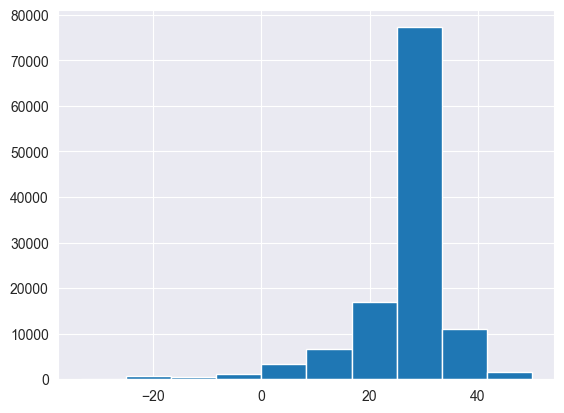

In [55]:
plt.hist(df.MaxTemp)

(array([5.4000e+01, 1.5800e+02, 8.2800e+02, 8.1700e+02, 1.8110e+03,
        7.2590e+03, 1.2788e+04, 2.6979e+04, 6.6392e+04, 1.9540e+03]),
 array([-38.33333333, -31.05555555, -23.77777778, -16.5       ,
         -9.22222222,  -1.94444445,   5.33333333,  12.61111111,
         19.88888889,  27.16666666,  34.44444444]),
 <BarContainer object of 10 artists>)

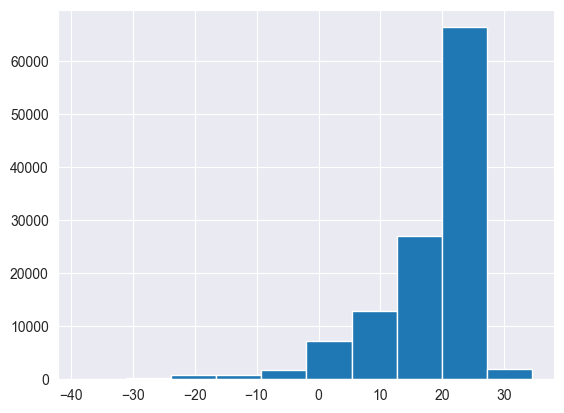

In [56]:
plt.hist(df.MinTemp)

{'whiskers': [<matplotlib.lines.Line2D at 0x118e851d0>,
 'caps': [<matplotlib.lines.Line2D at 0x118e85450>,
 'boxes': [<matplotlib.lines.Line2D at 0x118e85090>],
 'medians': [<matplotlib.lines.Line2D at 0x118e856d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x118e85810>],
 'means': []}

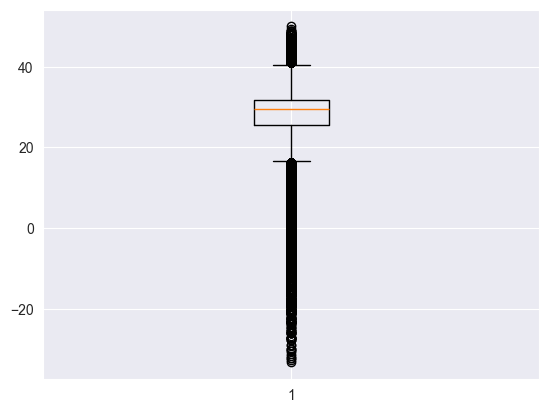

In [57]:
plt.boxplot(df.MaxTemp)


{'whiskers': [<matplotlib.lines.Line2D at 0x118ec3610>,
 'caps': [<matplotlib.lines.Line2D at 0x118ec3890>,
 'boxes': [<matplotlib.lines.Line2D at 0x118ec34d0>],
 'medians': [<matplotlib.lines.Line2D at 0x118ec3b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x118ec3c50>],
 'means': []}

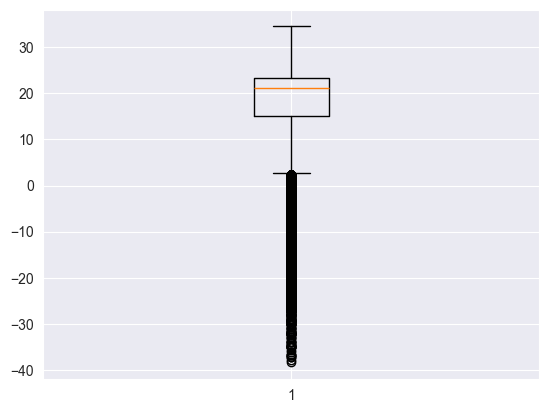

In [58]:
plt.boxplot(df.MinTemp)

In [59]:
def plot_histograms(scaled_dfs):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
    fig.suptitle("Scaler Effects", fontsize=16)



    for row, (name, sdf) in enumerate(scaled_dfs.items(), start=0):
        for i, col in enumerate(sdf.columns):
            sns.histplot(sdf[col], kde=True, ax=axes[row, i], bins=20)
            axes[row, i].set_title(f"{name} - {col}")

    plt.tight_layout()
    plt.show()


In [60]:
df1 = df[["MaxTemp", "MinTemp"]]

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaled_dfs = {}

for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df1)
    scaled_dfs[name] = pd.DataFrame(scaled, columns=df1.columns)

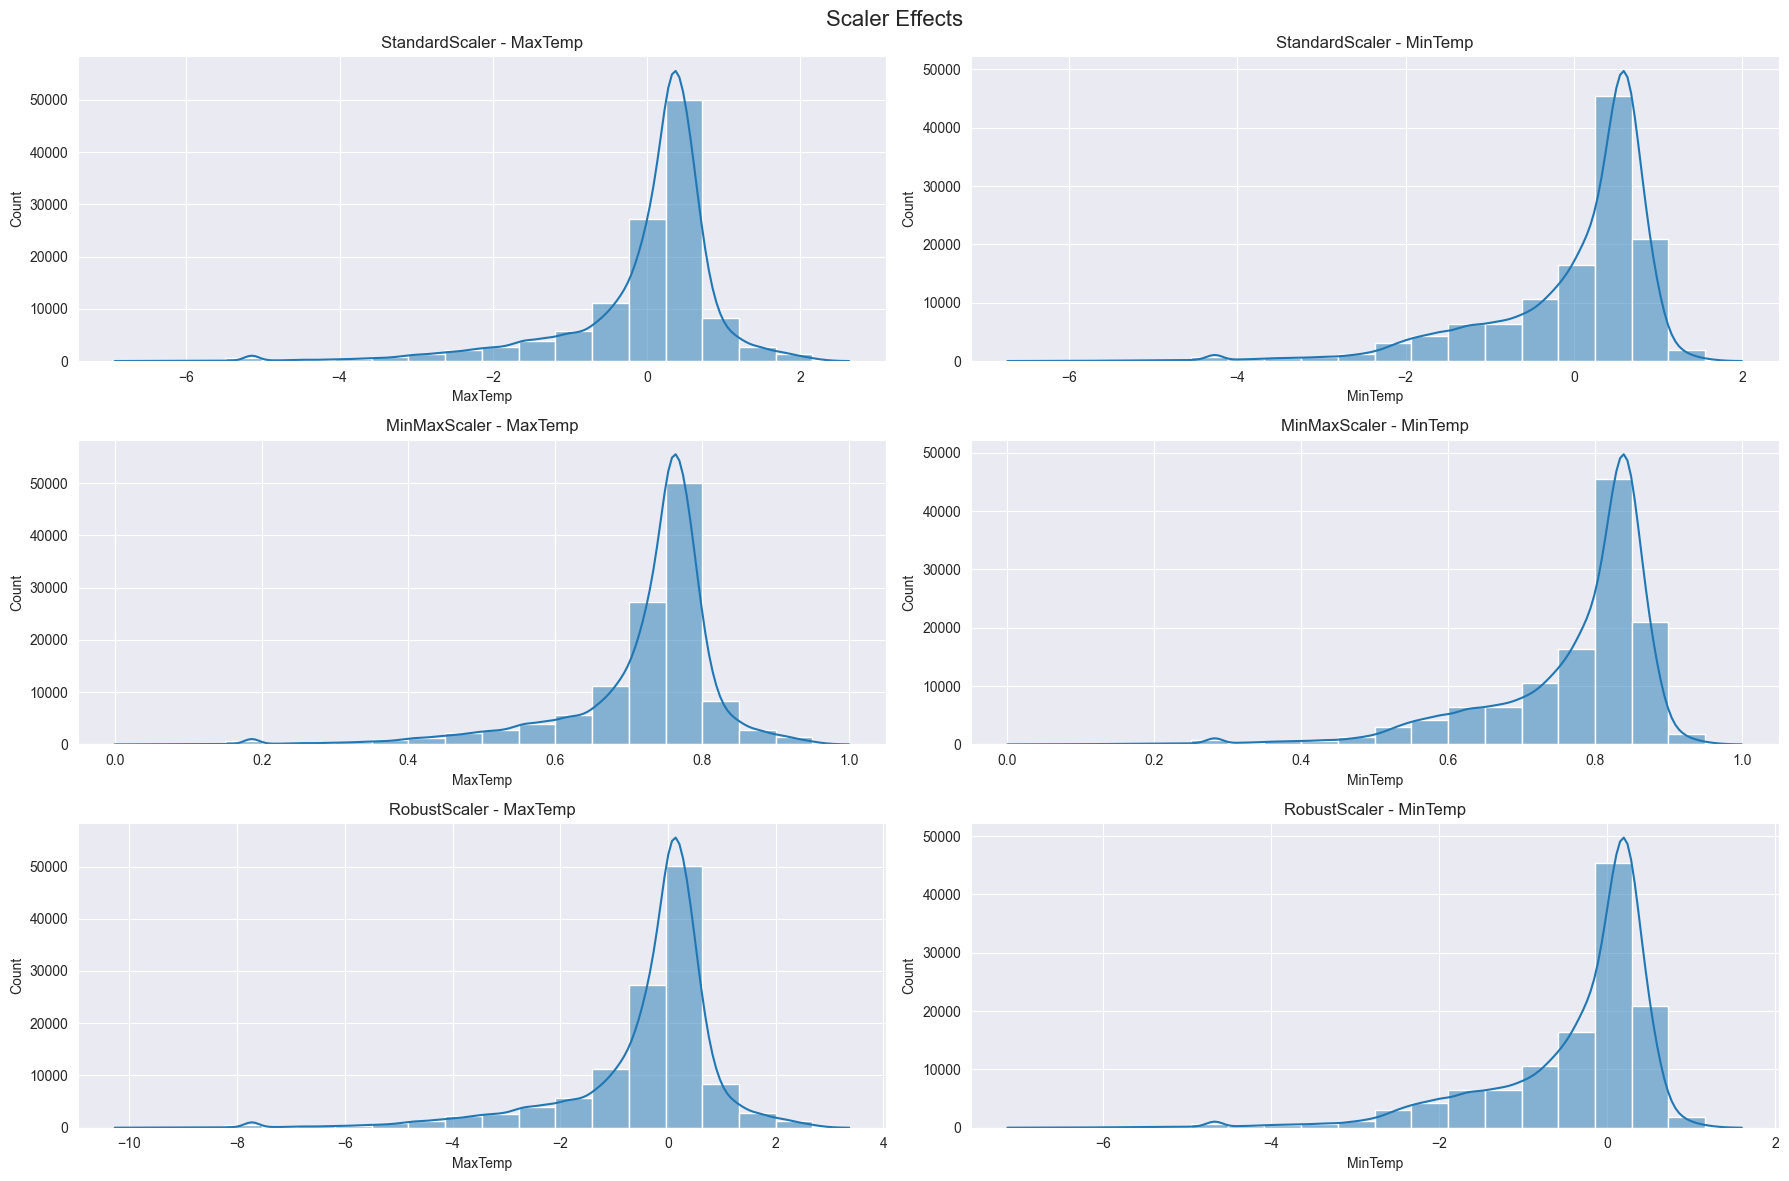

In [62]:
plot_histograms(scaled_dfs)

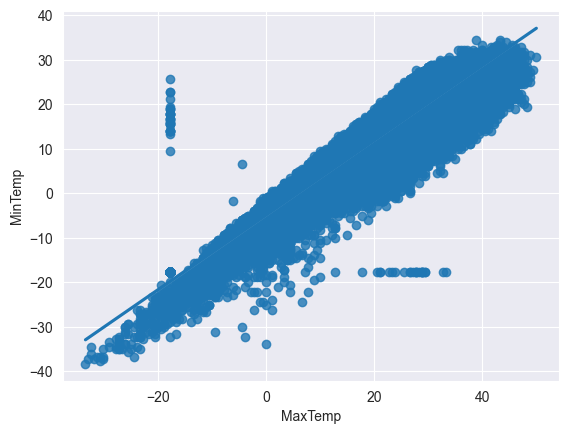

In [63]:
sns.regplot(x=df['MaxTemp'],y=df['MinTemp'])
plt.show()

In [64]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [65]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [66]:
X = df[["MaxTemp", "MinTemp"]]
y = df["MeanTemp"]

In [67]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [68]:
scaler = StandardScaler()

In [69]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [72]:
X_test[0]

array([0.02277235, 0.40024502])

In [73]:
## prediction
y_pred=regression.predict(X_test)

In [74]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  0.38666052138243107
mae:  0.16755377702304716
rmse:  0.6218203288590934


In [75]:
score = r2_score(y_test,y_pred)
print("score: ", score)

score:  0.9943704642418202


In [76]:
#adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9943700858746624

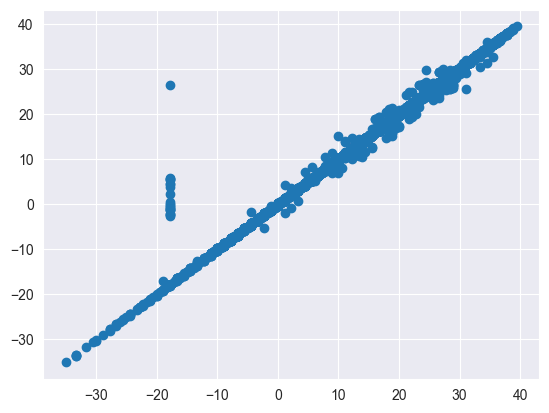

In [77]:
plt.scatter(y_test,y_pred)
plt.show()

In [78]:
residuals=y_test-y_pred
print(residuals)

54542    -0.270982
57708     0.278804
14285    -0.007837
46171     0.312949
59171     0.009309
            ...   
83356     0.000328
118662   -0.283755
27209    -0.005115
14344     0.279130
112330    0.005517
Name: MeanTemp, Length: 29760, dtype: float64


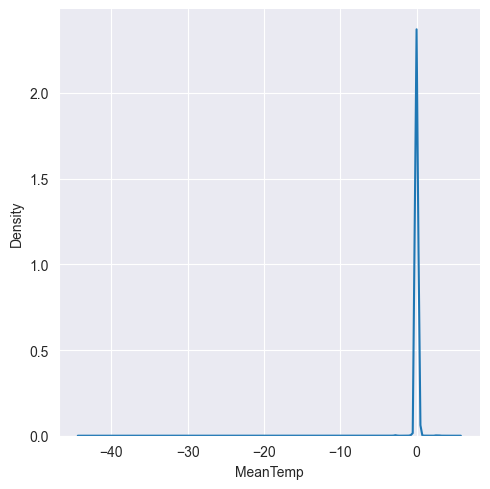

In [79]:
## if residuals are in normal distribution it seems good
sns.displot(residuals,kind='kde')
plt.show()

In [80]:
regression.coef_

array([4.38212092, 4.1669776 ])

In [81]:
regression.intercept_

np.float64(22.392267772277375)

In [82]:
weathers = [
    [16,45],
    [-8, 35],
    [10,45]
]

In [83]:
regression.predict(scaler.transform(weathers))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.4410528 , 13.38837542, 27.4254749 ])